<a href="https://colab.research.google.com/github/sonainjameel/Bleached-Corals-Detection-/blob/main/Copy_of_BleachedCorals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --ignore-installed kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached urllib3-1.26.6-py2.py3-none-any.whl (138 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached python_slugify-5.0.2-py2.py3-none-any.whl (6.7 kB)
  Using cached certifi-2021.5.30-py2.py3-none-any.whl (145 kB)
  Using cached tqdm-4.62.2-py2.py3-none-any.whl (76 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Using cached charset_normalizer-2.0.4-py3-none-any.whl (36 kB)
  Using cached idna-3.2-py3-none-any.whl (59 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incom

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sonainjamil","key":"3b981d2ee28b341b1a392c65d4bec914"}'}

In [ ]:
!mkdir ~/.kaggle #created at root folder in colab

In [ ]:
#copy
!cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sonainjamil/bleached-corals-detection

 81% 49.0M/60.5M [00:01<00:00, 49.6MB/s]
100% 60.5M/60.5M [00:01<00:00, 50.7MB/s]


In [ ]:
#unzip dataset in colab session
!unzip -q bleached-corals-detection.zip # -q for quiet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# copy zipped dataset into your drive
!cp "/content/bleached-corals-detection.zip" /content/drive/MyDrive/

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import model_from_json
from sklearn.preprocessing import LabelBinarizer
import os
from imutils import paths
from tqdm import tqdm
from matplotlib.pyplot import imshow

In [ ]:
train_path = "/content/Dataset/Train"
#dataset path

In [ ]:
# ImageDataGenerator to apply data augmentation, randomly translating, rotating, resizing, etc.
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen.fill_mode='constant'
train_datagen.horizontal_flip=True
train_datagen.zoom_range=[0.8, 1.2]
train_datagen.rotation_range=20
train_datagen.shear_range=10
train_datagen.brightness_range = [0.75, 1.5]


#making image as 227X227 for input of alexnet
train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical')

Found 480 images belonging to 2 classes.


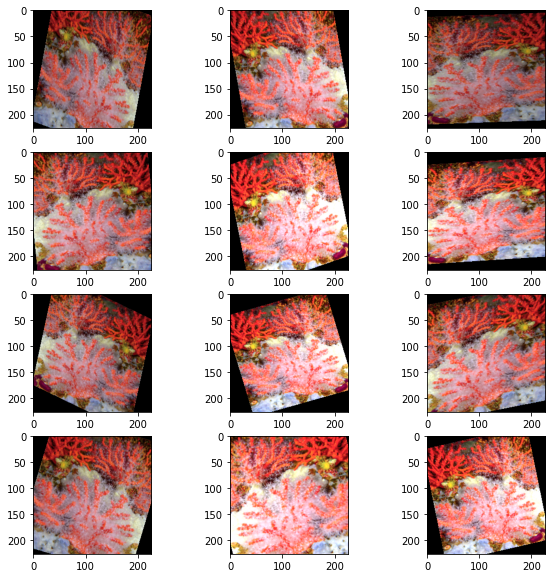

In [ ]:

fig , axs = plt.subplots(4,3 ,figsize = (10,10))

axs[0][0].imshow(train[1][0][0])
axs[0][1].imshow(train[1][0][0])
axs[0][2].imshow(train[1][0][0])
axs[1][0].imshow(train[1][0][0])
axs[1][1].imshow(train[1][0][0])
axs[1][2].imshow(train[1][0][0])
axs[2][0].imshow(train[1][0][0])
axs[2][1].imshow(train[1][0][0])
axs[2][2].imshow(train[1][0][0])
axs[3][0].imshow(train[1][0][0])
axs[3][1].imshow(train[1][0][0])
axs[3][2].imshow(train[1][0][0])

In [ ]:
### Training 
from keras.layers import Activation, MaxPooling2D
# Define A Training Model
model = Sequential()
# YOUR_CODE HERE
model.add(Conv2D(32, (3, 3), input_shape=(227, 227, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 225, 225, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 225, 225, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
activation_6 (Activation)    (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 53, 53, 64)       

In [ ]:
# printing summary of model
alexnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 57, 57, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 384)       1

In [ ]:

from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# compiling model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
# training our model
# we are using .fit method instead of .fit_generator because we have tensorflow 2.4.0
hist=model.fit(train,batch_size=64,epochs=10)

Epoch 1/10
15/15 [==============================] - 8s 508ms/step - loss: 0.0707 - accuracy: 0.9771
Epoch 2/10
15/15 [==============================] - 8s 504ms/step - loss: 0.0780 - accuracy: 0.9750
Epoch 3/10
15/15 [==============================] - 8s 503ms/step - loss: 0.1184 - accuracy: 0.9625
Epoch 4/10
15/15 [==============================] - 8s 501ms/step - loss: 0.0950 - accuracy: 0.9646
Epoch 5/10
15/15 [==============================] - 8s 501ms/step - loss: 0.0755 - accuracy: 0.9750
Epoch 6/10
15/15 [==============================] - 8s 502ms/step - loss: 0.0799 - accuracy: 0.9792
Epoch 7/10
15/15 [==============================] - 8s 503ms/step - loss: 0.0811 - accuracy: 0.9729
Epoch 8/10
15/15 [==============================] - 8s 505ms/step - loss: 0.0822 - accuracy: 0.9729
Epoch 9/10
15/15 [==============================] - 8s 504ms/step - loss: 0.0768 - accuracy: 0.9771
Epoch 10/10
15/15 [==============================] - 7s 486ms/step - loss: 0.1296 - accuracy: 0.9625

In [ ]:
# loading validation data
path_test = "/content/Dataset/Test"
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 120 images belonging to 2 classes.


In [ ]:
test_steps_per_epoch = np.math.ceil(test.samples / test.batch_size)

predictions = model.predict(test, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
true_classes = test.classes
class_labels = list(test.class_indices.keys())

In [ ]:
# checking cross validation accuracy/test accuracy
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

4/4 [==============================] - 0s 100ms/step - loss: 0.1212 - accuracy: 0.9500
Loss = 0.12117118388414383
Test Accuracy = 0.949999988079071


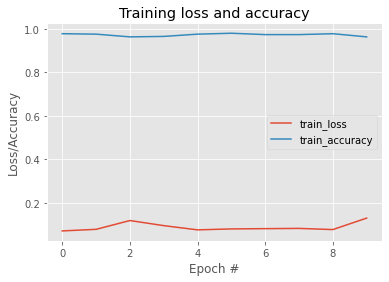

In [ ]:
import matplotlib.pyplot as plt
N = np.arange(0, 10)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, hist.history['loss'], label='train_loss')
plt.plot(N, hist.history['accuracy'], label='train_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()